In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
results_df=pd.read_csv("test_result.csv")
# actual, perdicted labels label
y_actual=results_df['label']
y_pred=results_df['prediction']

# predicted probabilities
y_predict_proba=[]
for idx,row in results_df.iterrows():
    y_predict_proba.append([row[3],row[4],row[5],row[6]])
    
results_df.head()

,image,label,prediction,ants_prob,bees_prob,cats_prob,dogs_prob
0,ant_2.jpg,ants,ants,0.662875,0.068995,0.163777,0.104352
1,ant_3.jpg,ants,ants,0.691574,0.039725,0.169226,0.099475
2,ant_4.jpg,ants,ants,0.964584,0.020865,0.007291,0.007260
3,ant_5.jpg,ants,ants,0.737400,0.071729,0.157447,0.033425
4,ant_7.jpg,ants,ants,0.570545,0.244455,0.038619,0.146381


## Confusion Matrix

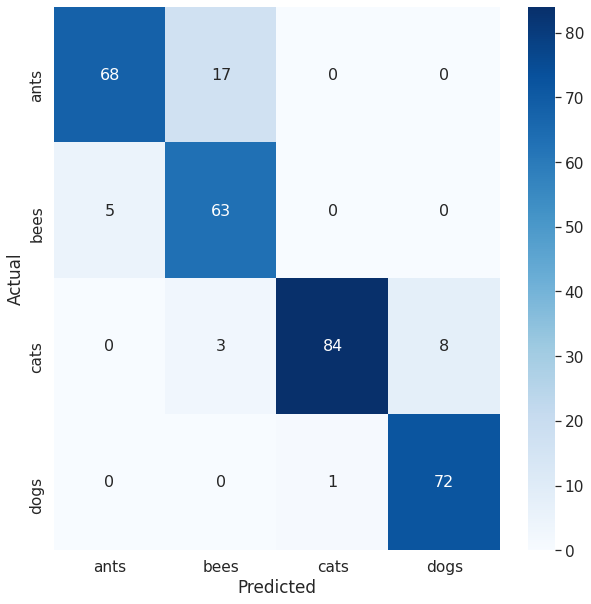

In [3]:
def view_confusionmatrix(predictions, actuals):  
    cf_matrix = metrics.confusion_matrix(predictions, actuals)
    df_cm = pd.DataFrame(cf_matrix, columns=np.unique(actuals), index = np.unique(actuals))    
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='g',annot_kws={"size": 16})
    return
view_confusionmatrix(y_pred, y_actual)

## ROC Curve

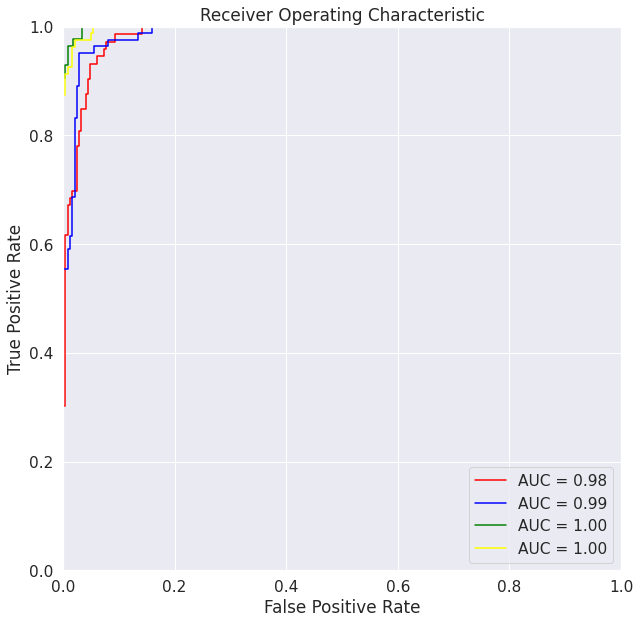

In [4]:
# ROC cruves for all the classes
class_names=y_actual.unique()
colors=['red','blue','green','yellow']
for i,c in enumerate(class_names):
    y_class_label=[1 if i==c else 0 for i in y_actual]
    y_class_proba=results_df[f'{c}_prob']
    fpr, tpr, thresholds =metrics.roc_curve(y_true=y_class_label, y_score=y_class_proba)
    roc_auc = metrics.auc(fpr, tpr)    
    plt.title('Receiver Operating Characteristic')    
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,color=colors[i])
    plt.legend(loc = 'lower right')
    #plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()


## Metrics: F1 Score, LogLoss

In [5]:
# F1 score
f1score=metrics.f1_score(y_true=y_actual,y_pred=y_pred,average='micro')
f1score=round(f1score,2)

# Log loss
logloss=metrics.log_loss(y_actual, y_predict_proba)


print(f"F1 score: {f1score}")
print(f"Log loss: {round(logloss,2)}")

F1 score: 0.89
Log loss: 0.33
